In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od
import os

In [2]:
pip -q install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
od.version()

'0.1.22'

In [4]:
dataset_url = 'https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset'


In [5]:
od.download(dataset_url)

Skipping, found downloaded files in "./breast-cancer-dataset" (use force=True to force download)


In [6]:
data_dir = 'breast-cancer-dataset'

In [7]:
os.listdir(data_dir)

['breast-cancer.csv']

In [8]:
breast_cancer = data_dir + '/breast-cancer.csv'

In [12]:
df=pd.read_csv(breast_cancer)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [15]:
#malignant(M)-have cancer or Benign(B)-no cancer cells count
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

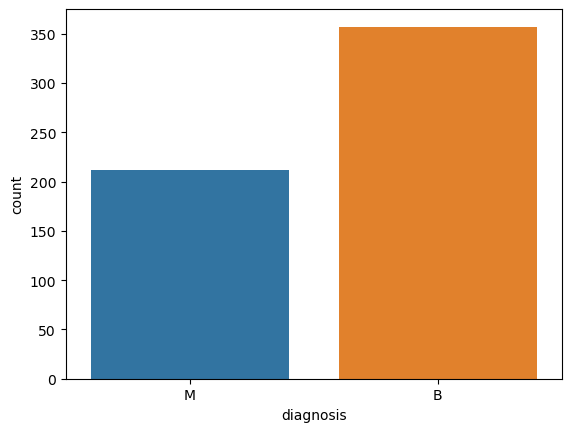

In [16]:
#Visualize the count
sns.countplot(data=df, x='diagnosis', label='count')

plt.show()

In [17]:
#encode categorical data into numerical
from sklearn.preprocessing import LabelEncoder


In [18]:
labelencoder_Y = LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)

/var/folders/mn/mp1xhgm522gc5vhffb_k61d00000gn/T/ipykernel_81273/1950520501.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)


In [19]:
df.iloc[:,1].head(100)
# 1 is malignant, and 0 is benign

0     1
1     1
2     1
3     1
4     1
     ..
95    1
96    0
97    0
98    0
99    1
Name: diagnosis, Length: 100, dtype: int64

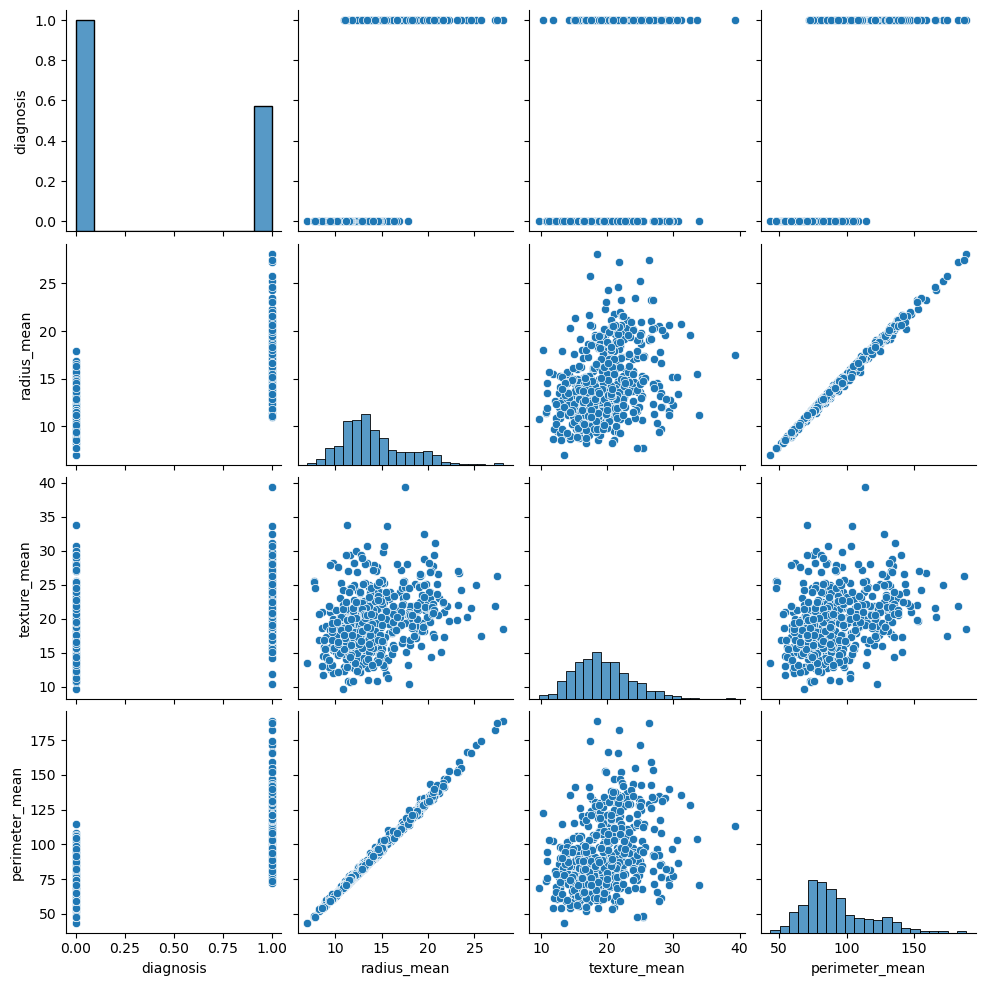

In [20]:
sns.pairplot(df.iloc[:,1:5])

we can see how one column can influence the other.like radius mean has influence on diagnosis column, but fractal dimension mean has a negative mean. 

with this correlation i WANT can eliminate graphs that are not too correlated with diagnosis.Dropping fractal_dimension_mean, symmetry_mean, smoothness_mean, texture_mean, compactness_mean. 

I should be left with diagnosis, concave points_mean, area_mean, perimeter_mean, radius_mean

In [21]:
correlation_matrix = df.corr()
high_correlations = correlation_matrix[correlation_matrix > 0.75]
high_correlations

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diagnosis,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.776614,...,0.776454,NaN,0.782914,NaN,NaN,NaN,NaN,0.793566,NaN,NaN
radius_mean,NaN,NaN,1.000000,NaN,0.997855,0.987357,NaN,NaN,NaN,0.822529,...,0.969539,NaN,0.965137,0.941082,NaN,NaN,NaN,NaN,NaN,NaN
texture_mean,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.912045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perimeter_mean,NaN,NaN,0.997855,NaN,1.000000,0.986507,NaN,NaN,NaN,0.850977,...,0.969476,NaN,0.970387,0.941550,NaN,NaN,NaN,0.771241,NaN,NaN
area_mean,NaN,NaN,0.987357,NaN,0.986507,1.000000,NaN,NaN,NaN,0.823269,...,0.962746,NaN,0.959120,0.959213,NaN,NaN,NaN,NaN,NaN,NaN
smoothness_mean,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.805324,NaN,NaN,NaN,NaN,NaN
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.883121,0.831135,...,NaN,NaN,NaN,NaN,NaN,0.865809,0.816275,0.815573,NaN,NaN
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.883121,1.000000,0.921391,...,NaN,NaN,NaN,NaN,NaN,0.754968,0.884103,0.861323,NaN,NaN
concave points_mean,NaN,0.776614,0.822529,NaN,0.850977,0.823269,NaN,0.831135,0.921391,1.000000,...,0.830318,NaN,0.855923,0.809630,NaN,NaN,0.752399,0.910155,NaN,NaN


radius_mean, perimeter_mean, area_mean, concave points_mean 



The columns radius_mean, perimeter_mean, area_mean, and concave points_mean are features or measurements related to breast cancer tumors. These features are often used in the analysis of breast cancer data to characterize tumors and help in the diagnosis of breast cancer. Here's what each of these features represents:

radius_mean: This feature represents the mean or average radius of the tumor. The radius is the distance from the center of the tumor to its outer boundary. A larger radius typically indicates a larger tumor.

perimeter_mean: This feature represents the mean or average perimeter of the tumor. The perimeter is the total length of the tumor's boundary or the distance around the tumor.

area_mean: This feature represents the mean or average area of the tumor. The area is the measure of the total surface area of the tumor in square units (e.g., square millimeters). It is often calculated based on the shape and size of the tumor.

concave points_mean: This feature represents the mean or average number of concave points on the boundary of the tumor. Concave points are indentations or depressions in the tumor's boundary. The presence and characteristics of concave points can provide information about the shape and texture of the tumor.

In [24]:
# Create a new DataFrame with selected features
df = df[['diagnosis', 'concave points_mean', 'radius_worst', 'perimeter_worst','concave points_worst']]
df

,diagnosis,concave points_mean,radius_worst,perimeter_worst,concave points_worst
0,1,0.14710,25.380,184.60,0.2654
1,1,0.07017,24.990,158.80,0.1860
2,1,0.12790,23.570,152.50,0.2430
3,1,0.10520,14.910,98.87,0.2575
4,1,0.10430,22.540,152.20,0.1625
...,...,...,...,...,...
564,1,0.13890,25.450,166.10,0.2216
565,1,0.09791,23.690,155.00,0.1628
566,1,0.05302,18.980,126.70,0.1418
567,1,0.15200,25.740,184.60,0.2650


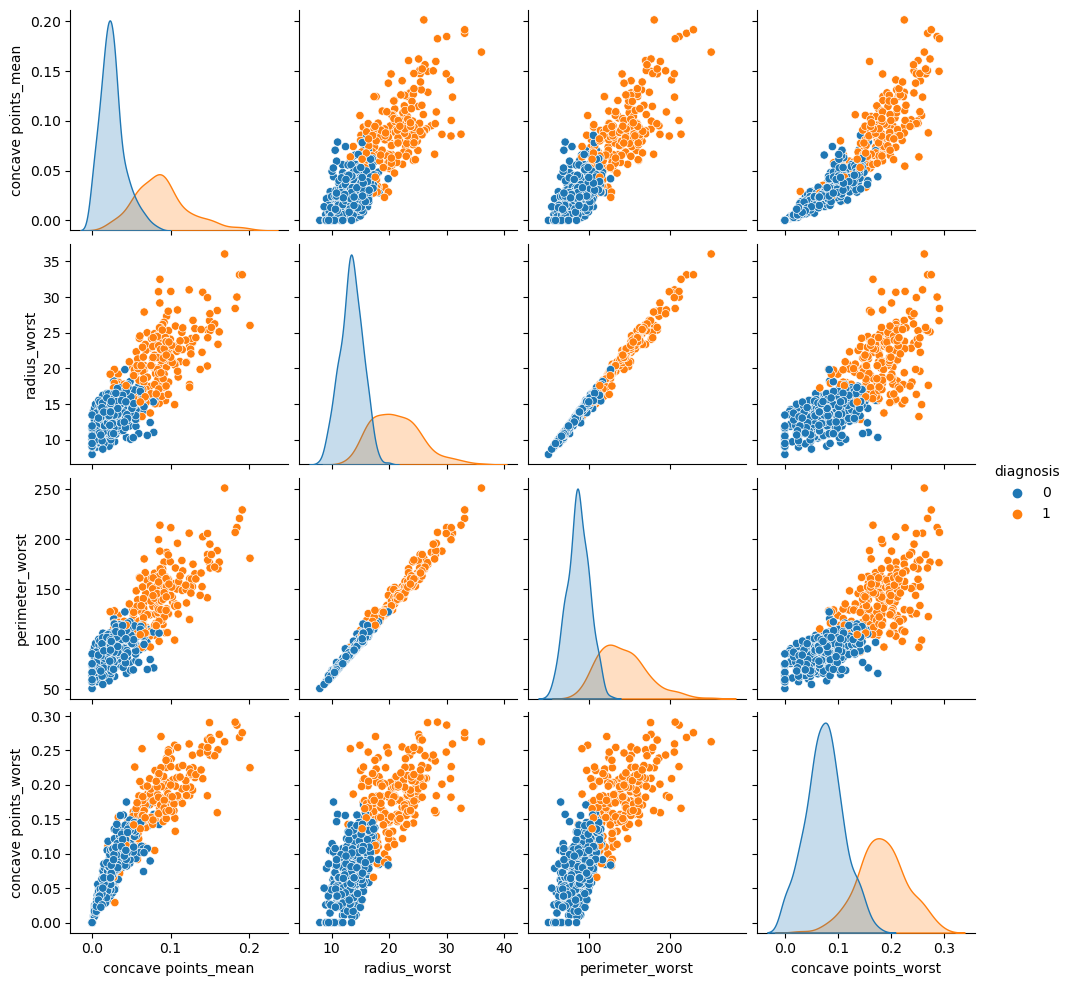

In [25]:
sns.pairplot(data=df,kind ="scatter",hue="diagnosis")

In [26]:
X = df.iloc[:,2:6].values # X is holding columns 2 to 4
Y = df['diagnosis'].values # Y is holding column 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state =42)

# 75% is X_train, 25% is X_test

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into a training set (70%) and a combined validation-test set (30%)
X_train, X_combined, Y_train, Y_combined = train_test_split(X, Y, test_size=0.3, random_state=42)

# Further split the combined validation-test set into separate validation (15%) and test (15%) sets
X_validation, X_test, Y_validation, Y_test = train_test_split(X_combined, Y_combined, test_size=0.5, random_state=42)

# Now, you have the following subsets:
# - X_train and Y_train: Training data and labels (70%)
# - X_validation and Y_validation: Validation data and labels (15%)
# - X_test and Y_test: Test data and labels (15%)



In [29]:
#scale the trained data using Features Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

In [30]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Create a majority class baseline model
majority_class_baseline = DummyClassifier(strategy="most_frequent")

# Fit the model to your training data (X_train, Y_train)
majority_class_baseline.fit(X_train, Y_train)

# Make predictions on the test data
predictions = majority_class_baseline.predict(X_test)

# Evaluate the baseline model using accuracy
accuracy = accuracy_score(Y_test, predictions)
print(f"Majority Class Baseline Accuracy: {accuracy}")


Majority Class Baseline Accuracy: 0.6976744186046512


In [31]:
def models(X_train, Y_train):
    # Import necessary libraries
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neighbors import KNeighborsClassifier  # Import K-Nearest Neighbors
    import xgboost as xgb  # Import XGBoost

    # Create and train the models
    log = LogisticRegression(random_state=42)
    log.fit(X_train, Y_train)

    tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
    tree.fit(X_train, Y_train)

    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
    forest.fit(X_train, Y_train)

    knn = KNeighborsClassifier(n_neighbors=12)  # 12 neighbors will get me .93
    knn.fit(X_train, Y_train)

    xgb = xgb.XGBClassifier(
                            max_depth=3,
                            learning_rate = 0.1,
                            n_estimators=100,
                            subsample=0.8,
                            colsample_bytree=0.8,
                            objective='binary:logistic',
                            random_state=42)  # Create an XGBoost classifier
    xgb.fit(X_train, Y_train)

    # Print model accuracy on training data
    print(f'[0]Logistic Regression Training Accuracy: {log.score(X_train, Y_train)}')
    print(f'[1]DecisionTreeClassifier Training Accuracy: {tree.score(X_train, Y_train)}')
    print(f'[2]RandomForestClassifier Training Accuracy: {forest.score(X_train, Y_train)}')
    print(f'[3]K-Nearest Neighbors Training Accuracy: {knn.score(X_train, Y_train)}')
    print(f'[4]XGBoost Training Accuracy: {xgb.score(X_train, Y_train)}')

    return log, tree, forest, knn, xgb



In [32]:
log, tree, forest, knn, xgb = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.9346733668341709
[1]DecisionTreeClassifier Training Accuracy: 1.0
[2]RandomForestClassifier Training Accuracy: 0.9949748743718593
[3]K-Nearest Neighbors Training Accuracy: 0.9447236180904522
[4]XGBoost Training Accuracy: 0.9773869346733668


In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(Y_test, log.predict(X_test)))


              precision    recall  f1-score   support

           0       0.98      0.95      0.97        60
           1       0.89      0.96      0.93        26

    accuracy                           0.95        86
   macro avg       0.94      0.96      0.95        86
weighted avg       0.96      0.95      0.95        86



In [34]:
from sklearn.metrics import accuracy_score
test_predictions = log.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)

print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.95


In [35]:
# print the prediction oflogistic regression
pred = log.predict(X_test)
print(pred)
print(Y_test)
# we are using this small percent of unseen data to let our logprec predict


[0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0]
[0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0]


In [36]:
# Assuming 'pred' contains your predictions and 'Y_test' contains the true labels
# Create a DataFrame to hold the predictions and true labels
predictions_df = pd.DataFrame({'Predictions': pred, 'True Labels': Y_test})

# Define the path where you want to save the CSV file
csv_file_path = 'predictions.csv'

# Save the DataFrame to a CSV file
predictions_df.to_csv(csv_file_path, index=False)

# Print a message to confirm that the file has been saved
print(f'Predictions saved to {csv_file_path}')


Predictions saved to predictions.csv
